In [ ]:
# Ej_5_1_con_funciones

In [1]:
#importar librerias
def importar_librerias_basicas():
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import pickle
    from mpl_finance import candlestick2_ohlc
    from datetime import datetime 

In [2]:
#obtencio de matriz de aprendizaje y test
def obtencio_de_matriz_de_aprendizaje_y_test_y_normalizarlo():
    import pandas as pd
    # guardo para luego subirlo un csv con el df maestro
    # asi, si pasa algo con el programa lo puedo recuperar
    # df.to_csv('df_maestro.csv')
    df_maestro = pd.read_csv('df_maestro.csv', header=0)
    # etiquetas y condiciones las pongo mas descriptivas
    df_maestro.Valor_Etiqueta = df_maestro.Valor_Etiqueta.astype(int)
    df_maestro.condicion_1 = df_maestro.condicion_1.astype(int)
    df_maestro.condicion_2 = df_maestro.condicion_2.astype(int)
    df_maestro.condicion_3_1 = df_maestro.condicion_3_1.astype(int)
    df_maestro.condicion_3_2 = df_maestro.condicion_3_2.astype(int)
    df_maestro.condicion_4 = df_maestro.condicion_4.astype(int)
    df_maestro.condicion_5 = df_maestro.condicion_5.astype(int)
    df_maestro.Valor_Etiqueta = df_maestro.Valor_Etiqueta.replace(0, "no")
    df_maestro.Valor_Etiqueta = df_maestro.Valor_Etiqueta.replace(1, "yes")
    # df_maestro.condicion_2 = df_maestro.condicion_2.replace(0, "Primero_Max")
    # df_maestro.condicion_2 = df_maestro.condicion_2.replace(1, "Primero_min")
    # df_maestro.condicion_4 = df_maestro.condicion_4.replace(0, "Volumen_1_no_Alto")
    # df_maestro.condicion_4 = df_maestro.condicion_4.replace(1, "Volumen_1_Alto")
    # df_maestro.condicion_5 = df_maestro.condicion_5.replace(0, "Volumen_2_no_Alto")
    # df_maestro.condicion_5 = df_maestro.condicion_5.replace(1, "Volumen_2_Alto")
    return df_maestro


In [14]:
def definir_features_y_target(df):
    features = df.loc[:,df.columns[5:13]] #es un df
    target = df.loc[:,df.columns[4]] #es una serie
    return features,target

In [433]:
#funciones dadas en notebooks de python por MIAX9 para prepocesado de dfs 

In [4]:
# La normalización de rango funciona de forma similar con el *MinMaxScaler*
# envio un df y me lso escala todas las columnas
def preprocesamiento_MinMaxScaler(df):
    from sklearn.preprocessing import MinMaxScaler
    df_norm_arr = MinMaxScaler().fit_transform(df)
    # print(pd.DataFrame(df_norm_arr, columns=df.columns).describe())
    return df_norm_arr
# features_norm_arr = preprocesamiento_MinMaxScaler(features)
# 3₃, 7₁


#sklearn puede generarnos un mapping para transformar a tipo numerico las caracteristicas
#nominales.  Las clases **OrdinalEncoder** y **LabelEncoder** nos permiten además 
#conservar ese mapping para transformar de la misma forma, por ejemplo un conjunto de test y poder realizar la transformación inversa para fines de interpretación
def preprocesamiento_OrdinalEncoder(df):
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()
    enc.categories_
    df = enc.fit_transform(df)
    # print(df.head())
    enc.inverse_transform(df)
    return df
# 3₂

# Podemos realizar la misma operación con la función *scale* del paquete preprocessing
def preprocesamiento_scale(df):
    import pandas as pd
    from sklearn.preprocessing import scale
    df_arr =  scale(df)
    df =  pd.DataFrame(df_arr, columns=df.columns)
    
    return df, df.mean()
# 3_3,  9₂

#Como alternativa más adecuada podemos utilizar los "Scalers" de sklearn que nos permiten
#guardar la transformación para aplicarlos sobre otros datasets, por ejemplo el de test.
def preprocesamiento_StandardScaler(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_z_array = scaler.fit_transform(df) # saca la distribucion estandat y lo aplicaca a si mismo
    df_z = pd.DataFrame(df_z_array, columns=df.columns)
    # print(df_z.head())

    return df_z
# df_z = preprocesamiento_StandardScaler(features)
#df_z
# 3_3, 7₁

In [5]:
def model_train_test_split (features,target):
    import numpy as np
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(features.values, # features,
                                                    target.values, #target,
                                                    test_size=0.4, # 0.3
                                                    stratify=target.values) # stratify=target) # random_state=7)

    vals_y_train, counts_y_train = np.unique(y_train, return_counts=True)
    # print(dict(zip(vals_y_train, counts_y_train)))

    vals_y_test, counts_y_test = np.unique(y_test, return_counts=True)
    # print(dict(zip(vals_y_test, counts_y_test)))
    

    return vals_y_train, counts_y_train, vals_y_test, counts_y_test, x_train, x_test, y_train, y_test
# 2_2, 3_3, 4_1, 5_3, 6_1, 6_2, 6_3, 7_1, 7_2, 7_3, 7_4


In [11]:
# METRICAS DE APUNTES DE NATEBOOKS DE CLASES DE MIAX9

In [6]:
def metrica_confusion_matrix (df_para_metrica_confusion_matrix, x_test, y_test):
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    test_predicted = df_para_metrica_confusion_matrix.predict(x_test)
    
    
    real = pd.Series(y_test, name='Real')
    predicted = pd.Series(test_predicted, name="Predicted")
    
    # se uso con algoritmo_AdaBoostClassifier
    # data_conf_matrix = confusion_matrix(y_test, test_predicted, labels=boost.classes_).T
    # a = pd.DataFrame(data_conf_matrix, index=boost.classes_, columns=boost.classes_)
    
    return  confusion_matrix(y_test, test_predicted), pd.crosstab(predicted, real)
# 2_2, 7_4

def metrica_accuracy_score (df_para_metrica_accuracy_score, x_test, y_test):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    test_predicted = df_para_metrica_accuracy_score.predict(x_test)
    #accuracy_score(test_y, pred_y)
    return accuracy_score(y_test, test_predicted)

#2_2, 3_3, 4_2, 6_1, 6_2, 6_3, 7_2, 7_3, 7_4

def metrica_all_SCORERS_keys (df_para_metrica, features, target):
    · con este solo hago un cross validate de lso parametros ['accuracy', 'roc_auc']. Para el Ej_5_2_vale. Pero a lo mejor podria hacerlo con mas parametros en el TFM
    import pandas as pd
    from sklearn.model_selection import cross_validate
    import sklearn
    scoring = ['accuracy', 'roc_auc'] # los valores que ha usado el profesor
    # scoring = list(sklearn.metrics.SCORERS.keys()) ############ para sacar mas valores para evaluar el algoritmo
    scores = cross_validate(df_para_metrica, features, target, scoring = scoring, cv=4)
    
    return pd.DataFrame(scores), pd.DataFrame(scores).mean()
# 4_2

def model_Kfold (df_para_metrica, features, target, n_splits):
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import KFold
    from sklearn.metrics import roc_auc_score
    kfold = KFold(n_splits=n_splits, shuffle=True)
    acc = []
    auc = []
    features_arr = features.to_numpy() 
    for train, test in kfold.split(features_arr):
        fold_train_x = features_arr[train]
        fold_train_y = target[train]
        df_para_metrica.fit(fold_train_x, fold_train_y)

        fold_test_x = features_arr[test]
        fold_test_y = target[test]

        i_acc = df_para_metrica.score(fold_test_x, fold_test_y)

        i_class = np.where(df_para_metrica.classes_ == 'yes')[0][0]
        # print('class:', i_class)
        fold_test_pred = df_para_metrica.predict_proba(fold_test_x)[:,i_class]
        i_auc = roc_auc_score(fold_test_y, fold_test_pred)
        auc.append(i_auc)
        acc.append(i_acc)
        result = pd.DataFrame({'auc':auc, 'accuracy':acc})
        
    return result, result.mean()
# 4_2

def metrica_roc_curve (df_para_metrica, x_test, y_test, x_train,y_train, pos_label,titulo):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    test_pred = df_para_metrica.predict_proba(x_test) #variable
    test_posprob = test_pred[:,1]

    train_pred = df_para_metrica.predict_proba(x_train) #variable
    train_posprob = train_pred[:,1]
    
    
    train_fpr, train_tpr, train_thr = roc_curve(y_train, train_posprob, pos_label=pos_label) #valores de etiqueta en la def
    test_fpr, test_tpr, test_thr = roc_curve(y_test, test_posprob, pos_label=pos_label) #valores de etiqueta en la def
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(train_fpr, train_tpr, color='r', label='train')
    plt.plot(test_fpr, test_tpr, color='g', label='test')

    plt.plot([0,1],[0,1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.0])
    plt.legend(loc='lower right')
    plt.title(titulo)
    
    return
# 4_1

def metrica_precision_score (y_test, test_predicted):
    from sklearn.metrics import precision_score
    from scipy import stats
    a= precision_score(y_test, test_predicted, average='micro')
    b= precision_score(y_test, test_predicted, average='macro')
    c= precision_score(y_test, test_predicted, average=None)
    tau, _ = stats.kendalltau(y_test, test_predicted)
    return a,b,c,tau
# 7,4

# es para regresiones
def metrica_r2_score (df_para_metrica, x_test, y_test, x_train, y_train):
   
    from sklearn.metrics import r2_score
    y_pred = df_para_metrica.predict(x_test)    
    y_pred_train = df_para_metrica.predict(x_train)
    
    y_pred[y_pred == 'no'] = 0
    y_pred[y_pred == 'yes'] = 1
    y_pred_train[y_pred_train == 'no'] = 0
    y_pred_train[y_pred_train == 'yes'] = 1
    y_test[y_test == 'no'] = 0
    y_test[y_test == 'yes'] = 1    
    y_train[y_train == 'no'] = 0
    y_train[y_train == 'yes'] = 1 
    
    return r2_score(y_test, y_pred) , r2_score(y_train, y_pred_train)


#regtree = DecisionTreeRegressor()
#regtree = regtree.fit(x_train, y_train)
# a, b = metrica_r2_score (dTree, x_test, y_test, x_train, y_train)
# 5_3

def metrica_roc_auc_score (df_para_metrica, x_test, y_test, x_train, y_train):
    from sklearn.metrics import roc_auc_score
    
    test_pred = df_para_metrica.predict_proba(x_test)
    test_posprob = test_pred[:,1]

    train_pred = df_para_metrica.predict_proba(x_train)
    train_posprob = train_pred[:,1]
    y_test[y_test == 1] = 'yes'
    y_test[y_test == 0] = 'no'
    y_train[y_train == 1] = 'yes'
    y_train[y_train == 0] = 'no'
    return roc_auc_score(y_test, test_posprob), roc_auc_score(y_train, train_posprob)

In [7]:
# ALBORITMOS DE CLASIFICACION DE APUNTES DE NATEBOOKS DE CLASES DE MIAX9
# 1. ENTRENO ARBOL DE DECISION
def algoritmo_DecisionTreeClassifier_train_max_depth (x_train, y_train,max_depth):
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    # dTree = DecisionTreeClassifier(max_depth,min_samples_leaf)
    dTree = DecisionTreeClassifier(max_depth = max_depth)
    _ = dTree.fit(x_train, y_train)
    fig, ax = plt.subplots(figsize=(10,10))
    _ = plot_tree(dTree, feature_names=features.columns,
                            class_names=dTree.classes_,
                            filled=True)        
    return dTree


def algoritmo_DecisionTreeClassifier_train_min_samples_leafh (x_train, y_train,min_samples_leaf):
    from sklearn.tree import DecisionTreeClassifier, plot_tree
    # dTree = DecisionTreeClassifier(max_depth,min_samples_leaf)
    dTree = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
    _ = dTree.fit(x_train, y_train)
    fig, ax = plt.subplots(figsize=(10,10))
    _ = plot_tree(dTree, feature_names=features.columns,
                            class_names=dTree.classes_,
                            filled=True)
    return dTree

# 2. ENTRENO CON KNeighborsClassifier
def algoritmo_KNeighborsClassifier (x_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    #_ = knn.fit(features.values, target)
    _ = knn.fit(x_train, y_train)    
    # return knn.predict(x_train), knn.score(x_train, y_train)
    return knn

# 3. ENTRENO CON GaussianNB
def algoritmo_GaussianNB (x_train, y_train):
    from sklearn.naive_bayes import GaussianNB
    nbayes = GaussianNB()
    _ = nbayes.fit(x_train, y_train)
    return nbayes

# 4. ENTRENO CON LogisticRegression
def model_LogisticRegression (x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression()
    _=logreg.fit(x_train,y_train)
    return logreg

# 5. ENTRENO CON BaggingClassifier
def algoritmo_BaggingClassifier (df_base_estimator,x_train, y_train, n_estimators, random_state):
    from sklearn.ensemble import BaggingClassifier
    bagg = BaggingClassifier(base_estimator=df_base_estimator,
                         n_estimators=n_estimators, 
                         random_state=random_state)
    bagg = bagg.fit(x_train, y_train)
    return bagg

# 6. ENTRENO CON RandomForestClassifier

def algoritmo_RandomForestClassifier (x_train, y_train,step,cv,features, target,param_grid,verbose,n_estimators):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import RFECV
    from sklearn.model_selection import GridSearchCV
    # rforest = RandomForestClassifier()
    rforest = RandomForestClassifier(n_estimators=n_estimators)
    #print(rforest.get_params())
    
    ###########################################
    # 7_2 esta parte es para selecionar caracteriticas. Por ahora no lo uso
    #selector = RFECV(estimator=rforest, 
    #             step=1,
    #             cv=5)
    #selector.fit(features, target)    
    ###########################################
    grid_cv = GridSearchCV(estimator = rforest, 
                       param_grid = param_grid, 
                       cv = cv, 
                       verbose=verbose)
    _ = grid_cv.fit(x_train, y_train)
    best_params = grid_cv.best_params_
    best_rf = grid_cv.best_estimator_
    return grid_cv, best_rf, best_params
    # return pd.Series(selector.get_support(), index=features.columns), selector.n_features_
    
# 7. ENTRENO CON AdaBoostClassifier
def algoritmo_AdaBoostClassifier (x_train, y_train,n_estimators):
    from sklearn.ensemble import AdaBoostClassifier
    # boost = AdaBoostClassifier()
    boost = AdaBoostClassifier(n_estimators=3)
    _ = boost.fit(x_train, y_train)
    #boost.classes_    
    # ordinal_models[iclass] = boost.fit(train_x, i_target)
    # print(boost.classes_)
    # i_label = np.where(boost.classes_ == True)[0][0]
    # print(i_label)
    # ordinal_preds[iclass] = boost.predict_proba(test_x)[:,i_label] 
    # pd.DataFrame(ordinal_preds)
    return boost
    

In [8]:
def entreno_todos_algoritmos_conozco ():
    # Entreno todos los algoritmos con el set de caracteristicas para y las etiquetas
    # ALG.1
    # dTree = algoritmo_DecisionTreeClassifier_train_max_depth (x_train, y_train,max_depth=5,min_samples_leaf=3)
    dTree = algoritmo_DecisionTreeClassifier_train_max_depth (x_train, y_train,max_depth=5)
    # ALG.2
    knn = algoritmo_KNeighborsClassifier (x_train, y_train)
    # ALG.3
    nbayes = algoritmo_GaussianNB (x_train, y_train)
    # ALG.4
    logreg = model_LogisticRegression (x_train, y_train)
    # ALG.5
    bagg_dTree = algoritmo_BaggingClassifier (dTree, x_train, y_train, n_estimators = 10, random_state=0)
    # ALG.6
    bagg_knn = algoritmo_BaggingClassifier (knn, x_train, y_train, n_estimators = 10, random_state=0)
    # ALG.7
    bagg_nbayes = algoritmo_BaggingClassifier (nbayes, x_train, y_train, n_estimators = 10, random_state=0)
    # ALG.8
    bagg_logreg = algoritmo_BaggingClassifier (logreg, x_train, y_train, n_estimators = 10, random_state=0)
    # ALG.9
    #Definimos un espacio de parámetros.  Cada prueba consistirá en una combinación de estos parámetros posibles
    param_grid = {'max_features': [2, 3, 5, 8],'n_estimators': [20, 50, 100]}
    grid_cv, best_rf, best_params = algoritmo_RandomForestClassifier (x_train, y_train,1, 5 ,features, target,param_grid,3,20)
    # ALG.10
    boost = algoritmo_AdaBoostClassifier (x_train, y_train,n_estimators=3)
    # ALG.11
    bagg_best_rf = algoritmo_BaggingClassifier (best_rf, x_train, y_train, n_estimators = 10, random_state=0)
    # ALG.12
    bagg_boost = algoritmo_BaggingClassifier (boost, x_train, y_train, n_estimators = 10, random_state=0)
    
    return dTree,knn,nbayes,logreg,bagg_dTree,bagg_knn,bagg_nbayes,bagg_logreg,best_rf,boost,bagg_best_rf,bagg_boost

In [9]:
def crear_matrices_metricas_y_graficas (x_test, y_test, x_train, y_train):
    #guardo en test_predicted_resumen todos los test predecidos
    import pandas as pd
    test_predicted_resumen = pd.DataFrame(y_test, columns = ['label'])

    test_predicted = dTree.predict(x_test)
    test_predicted_resumen['dTree'] = test_predicted
    test_predicted = knn.predict(x_test)
    test_predicted_resumen['knn'] = test_predicted
    test_predicted = nbayes.predict(x_test)
    test_predicted_resumen['nbayes'] = test_predicted
    test_predicted = logreg.predict(x_test)
    test_predicted_resumen['logreg'] = test_predicted
    test_predicted = bagg_dTree.predict(x_test)
    test_predicted_resumen['bagg_dTree'] = test_predicted
    test_predicted = bagg_knn.predict(x_test)
    test_predicted_resumen['bagg_knn'] = test_predicted
    test_predicted = bagg_nbayes.predict(x_test)
    test_predicted_resumen['bagg_nbayes'] = test_predicted
    test_predicted = bagg_logreg.predict(x_test)
    test_predicted_resumen['bagg_logreg'] = test_predicted
    test_predicted = best_rf.predict(x_test)
    test_predicted_resumen['best_rf'] = test_predicted
    test_predicted = boost.predict(x_test)
    test_predicted_resumen['boost'] = test_predicted
    test_predicted = bagg_best_rf.predict(x_test)
    test_predicted_resumen['bagg_best_rf'] = test_predicted
    test_predicted = bagg_boost.predict(x_test)
    test_predicted_resumen['bagg_boost'] = test_predicted
    #test_predicted_resumen

    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(dTree, x_test, y_test)
    matriz_confusion_df_resumen  = matriz_confusion_df
    matriz_confusion_df_resumen.columns =['dTree_no','dTree_si']
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(knn, x_test, y_test)
    matriz_confusion_df_resumen['knn_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['knn_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(nbayes, x_test, y_test)
    matriz_confusion_df_resumen['nbayes_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['nbayes_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(logreg, x_test, y_test)
    matriz_confusion_df_resumen['logreg_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['logreg_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(bagg_dTree, x_test, y_test)
    matriz_confusion_df_resumen['bagg_dTree_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['bagg_dTree_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(bagg_knn, x_test, y_test)
    matriz_confusion_df_resumen['bagg_knn_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['bagg_knn_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(bagg_nbayes, x_test, y_test)
    matriz_confusion_df_resumen['bagg_nbayes_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['bagg_nbayes_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(bagg_logreg, x_test, y_test)
    matriz_confusion_df_resumen['bagg_logreg_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['bagg_logreg_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(best_rf, x_test, y_test)
    matriz_confusion_df_resumen['best_rf_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['best_rf_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(boost, x_test, y_test)
    matriz_confusion_df_resumen['boost_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['boost_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(bagg_best_rf, x_test, y_test)
    matriz_confusion_df_resumen['bagg_best_rf_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['bagg_best_rf_si'] = matriz_confusion[1]
    matriz_confusion, matriz_confusion_df = metrica_confusion_matrix(bagg_boost, x_test, y_test)
    matriz_confusion_df_resumen['bagg_boost_no'] = matriz_confusion[0]
    matriz_confusion_df_resumen['bagg_boost_si'] = matriz_confusion[1]

    columns = ['dTree', 'knn','nbayes', 'logreg','bagg_dTree', 'bagg_knn','bagg_nbayes', 'bagg_logreg','best_rf', 'boost','bagg_best_rf', 'bagg_boost']
    metrica_accuracy_score_resumen = pd.DataFrame(columns = columns)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','dTree'] = metrica_accuracy_score (dTree, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','knn'] = metrica_accuracy_score (knn, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','nbayes'] = metrica_accuracy_score (nbayes, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','logreg'] = metrica_accuracy_score (logreg, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','bagg_dTree'] = metrica_accuracy_score (bagg_dTree, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','bagg_knn'] = metrica_accuracy_score (bagg_knn, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','bagg_nbayes'] = metrica_accuracy_score (bagg_nbayes, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','bagg_logreg'] = metrica_accuracy_score (bagg_logreg, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','best_rf'] = metrica_accuracy_score (best_rf, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','boost'] = metrica_accuracy_score (boost, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','bagg_best_rf'] = metrica_accuracy_score (bagg_best_rf, x_test, y_test)
    metrica_accuracy_score_resumen.loc['metrica_accuracy_score','bagg_boost'] = metrica_accuracy_score (bagg_boost, x_test, y_test)



    index = ['0_fit_time', '0_score_time', '0_test_accuracy', '0_test_roc_auc',
             '1_fit_time', '1_score_time', '1_test_accuracy', '1_test_roc_auc',
             '2_fit_time', '2_score_time', '2_test_accuracy', '2_test_roc_auc',
             '3_fit_time', '3_score_time', '3_test_accuracy', '3_test_roc_auc',
             'mean_fit_time', 'mean_score_time', 'mean_test_accuracy', 'mean_test_roc_auc',
             'Kfold_0_auc', 'Kfold_0_accuracy', 'Kfold_1_auc', 'Kfold_1_accuracy',
             'Kfold_2_auc', 'Kfold_2_accuracy', 'Kfold_3_auc', 'Kfold_3_accuracy',
             'Kfold_mean_auc', 'Kfold_mean_accuracy', 
             'precision_score_micro','precision_score_macro','precision_score_ninguno','precision_score_tao',
             'r2_score(y_test, y_pred)','r2_score(y_train, y_pred_train)',
             'roc_auc_score_test', 'roc_auc_score_train',
             'accuracy(Precision_global)_FERNANDO', 'precision(Precision_de_clase)_FERNANDO', 'recall(Sensibilidad)_FERNANDO', 
             'speciﬁcity(Especiﬁcidad)_FERNANDO', 'Ratio_de_falsos_positivos_(1-speciﬁcity)_FERNANDO']        

    columns = ['dTree', 'knn','nbayes', 'logreg','bagg_dTree', 'bagg_knn','bagg_nbayes', 'bagg_logreg','best_rf', 'boost','bagg_best_rf', 'bagg_boost']
    metrica_all_SCORERS_keys_y_model_Kfold_resumen = pd.DataFrame(index = index, columns = columns)
    columns_2 = [dTree, knn,nbayes, logreg,bagg_dTree, bagg_knn,bagg_nbayes, bagg_logreg,best_rf, boost,bagg_best_rf, bagg_boost]
    col = 0
    for i in columns_2:
        a, b = metrica_all_SCORERS_keys (i, features, target)
        c, d = model_Kfold (dTree, features, target, n_splits = 4)
        for i in range(0,4):
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[i,col] = a.iloc[0,i]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[i+4,col] = a.iloc[1,i]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[i+8,col] = a.iloc[2,i]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[i+12,col] = a.iloc[3,i]       
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[i+16,col] = b[i]
        for j in range(0,2): 
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[j+20,col] = c.iloc[0,j]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[j+22,col] = c.iloc[1,j]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[j+24,col] = c.iloc[2,j]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[j+26,col] = c.iloc[3,j]
            metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[j+28,col] = d[j]

        col = col+ 1


    columns = ['dTree', 'knn','nbayes', 'logreg','bagg_dTree', 'bagg_knn','bagg_nbayes', 'bagg_logreg','best_rf', 'boost','bagg_best_rf', 'bagg_boost']
    col=0
    for i in columns :
        micro, macro, ninguno, tao = metrica_precision_score (y_test, test_predicted_resumen[i])
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[30,col] = micro
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[31,col] = macro
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[32,col] = ninguno
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[33,col] = tao
        col = col + 1


    columns_2 = [dTree, knn,nbayes, logreg,bagg_dTree, bagg_knn,bagg_nbayes, bagg_logreg,best_rf, boost,bagg_best_rf, bagg_boost]
    col=0
    for i in columns_2:
        a, b = metrica_r2_score (i, x_test, y_test, x_train, y_train)
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[34,col] = a
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[35,col] = b
        c, d = metrica_roc_auc_score (i, x_test, y_test, x_train, y_train)
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[36,col] = c
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[37,col] = d    
        col = col + 1


    columns = ['dTree', 'knn','nbayes', 'logreg','bagg_dTree', 'bagg_knn','bagg_nbayes', 'bagg_logreg','best_rf', 'boost','bagg_best_rf', 'bagg_boost']
    col=0
    for i in range(0,matriz_confusion_df_resumen.shape[1],2):
        mc = matriz_confusion_df_resumen.iloc[:,i:i+2]
        TN = mc.iloc[0,0]
        FP = mc.iloc[1,0]
        FN = mc.iloc[0,1]
        TP = mc.iloc[1,1] 
        P = TP + FN
        N = TN + FP 
        acc = (TP + TN) / (P + N)
        prec = (TP) / (TP + FP)
        rec = TP / P
        spe = TN / N
        rfp = FP / N
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[38,col] = acc
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[39,col] = prec
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[40,col] = rec
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[41,col] = spe
        metrica_all_SCORERS_keys_y_model_Kfold_resumen.iloc[42,col] = rfp
        col = col + 1
    metrica_all_SCORERS_keys_y_model_Kfold_resumen


    # tit=0
    # for i in columns_2:
    #     metrica_roc_curve (i, x_test, y_test, x_train,y_train, pos_label= 'yes',titulo =columns[tit])
    #     tit = tit +1

    return test_predicted_resumen, matriz_confusion_df_resumen, metrica_accuracy_score_resumen, metrica_all_SCORERS_keys_y_model_Kfold_resumen

In [10]:
def metrica_roc_curve_pdf (df_para_metrica, x_test, y_test, x_train,y_train, pos_label,titulo):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    test_pred = df_para_metrica.predict_proba(x_test) #variable
    test_posprob = test_pred[:,1]

    train_pred = df_para_metrica.predict_proba(x_train) #variable
    train_posprob = train_pred[:,1]
    
    
    train_fpr, train_tpr, train_thr = roc_curve(y_train, train_posprob, pos_label=pos_label) #valores de etiqueta en la def
    test_fpr, test_tpr, test_thr = roc_curve(y_test, test_posprob, pos_label=pos_label) #valores de etiqueta en la def
    
    fig, ax = plt.subplots(figsize=(5,5))
    plt.plot(train_fpr, train_tpr, color='r', label='train')
    plt.plot(test_fpr, test_tpr, color='g', label='test')

    plt.plot([0,1],[0,1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.0])
    plt.legend(loc='lower right')
    plt.title(titulo)
    
    nombre = f'{titulo}.pdf'
    fig.savefig(nombre, format='pdf')
    
    return

def guardar_todas_graficas_ROC_en_un_pdf (x_test, y_test, x_train,y_train):
    columns_2 = [dTree, knn,nbayes, logreg,bagg_dTree, bagg_knn,bagg_nbayes, bagg_logreg,best_rf, boost,bagg_best_rf, bagg_boost]
    columns = ['dTree', 'knn','nbayes', 'logreg','bagg_dTree', 'bagg_knn','bagg_nbayes', 'bagg_logreg','best_rf', 'boost','bagg_best_rf', 'bagg_boost']
    tit=0
    for i in columns_2:
        metrica_roc_curve_pdf (i, x_test, y_test, x_train,y_train, pos_label= 'yes',titulo =columns[tit])    
        tit = tit +1

    from PyPDF2 import PdfMerger
    pdfs = []
    tit=0
    for i in range(0,len(columns_2)):
        titulo =columns[tit]
        pdfs.append(f'{titulo}.pdf')
        tit = tit +1
    pdfs

    merger = PdfMerger()

    for pdf in pdfs:
        merger.append(pdf)

    merger.write("Graficas_Ej_5_1_ROC_Todas.pdf")
    merger.close()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...max_features=2, n_estimators=20;, score=0.722 total time=   0.0s
[CV 2/5] END ...max_features=2, n_estimators=20;, score=0.778 total time=   0.0s
[CV 3/5] END ...max_features=2, n_estimators=20;, score=0.588 total time=   0.0s
[CV 4/5] END ...max_features=2, n_estimators=20;, score=0.765 total time=   0.0s
[CV 5/5] END ...max_features=2, n_estimators=20;, score=0.765 total time=   0.0s
[CV 1/5] END ...max_features=2, n_estimators=50;, score=0.722 total time=   0.0s
[CV 2/5] END ...max_features=2, n_estimators=50;, score=0.833 total time=   0.0s
[CV 3/5] END ...max_features=2, n_estimators=50;, score=0.647 total time=   0.0s
[CV 4/5] END ...max_features=2, n_estimators=50;, score=0.706 total time=   0.0s
[CV 5/5] END ...max_features=2, n_estimators=50;, score=0.765 total time=   0.0s
[CV 1/5] END ..max_features=2, n_estimators=100;, score=0.722 total time=   0.1s
[CV 2/5] END ..max_features=2, n_estimators=100;

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: Undefi

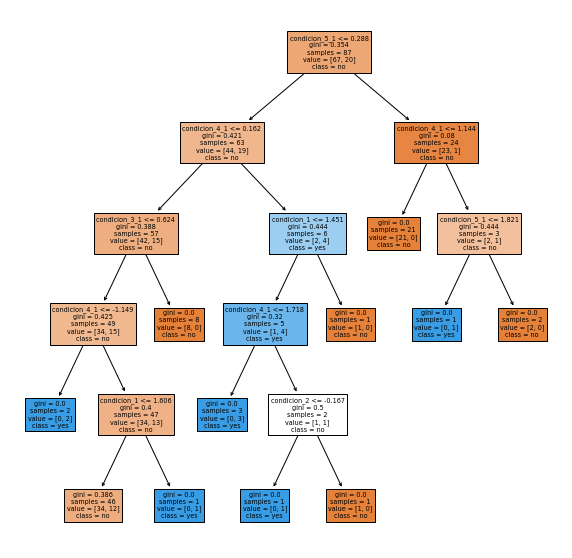

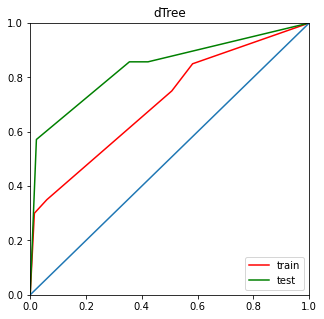

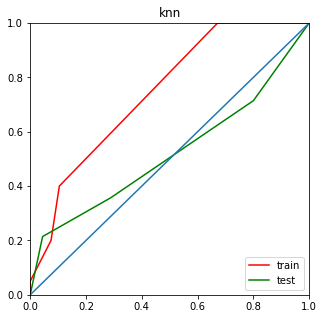

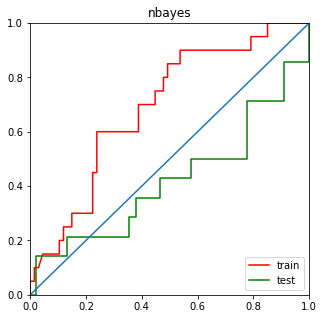

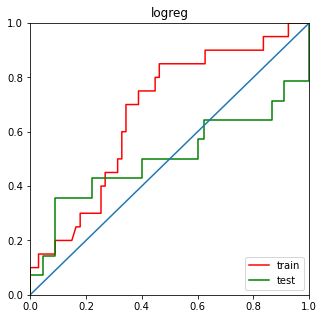

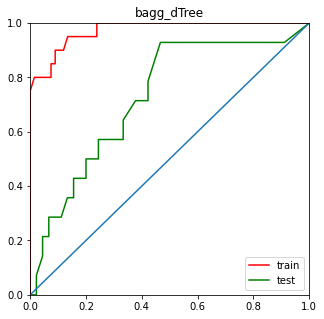

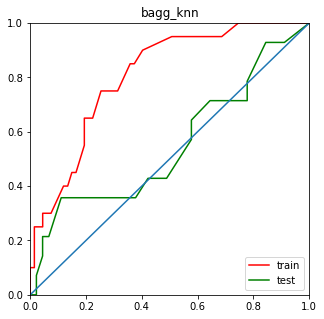

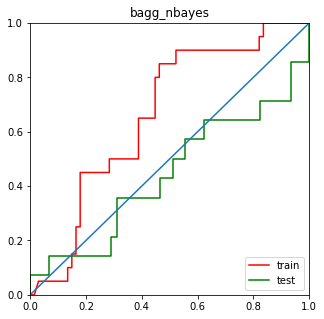

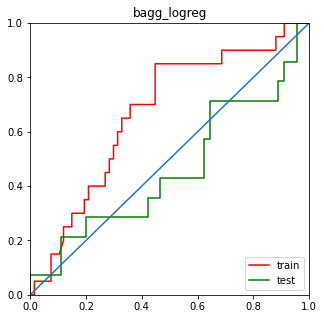

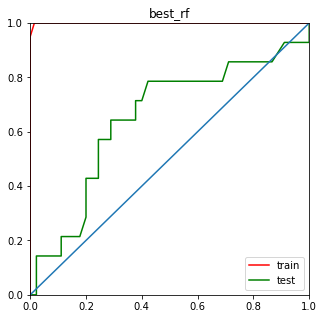

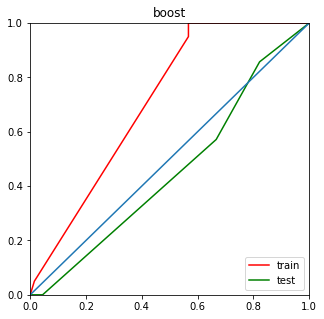

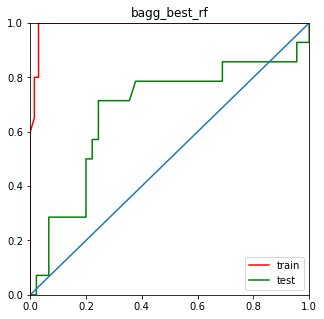

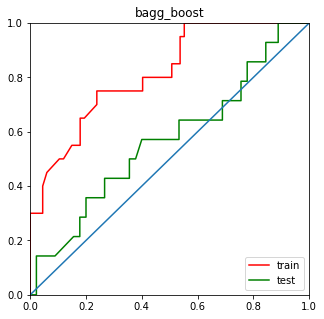

In [26]:
importar_librerias_basicas()
df_maestro = obtencio_de_matriz_de_aprendizaje_y_test_y_normalizarlo()
features,target = definir_features_y_target(df_maestro)
# print(features,target)
features, features_mean = preprocesamiento_scale(features) # aplico escala
# print(features,target)
vals_y_train, counts_y_train, vals_y_test, counts_y_test, x_train, x_test, y_train, y_test = model_train_test_split(features,target)
# print(dict(zip(vals_y_train, counts_y_train))), print(dict(zip(vals_y_test, counts_y_test)))
dTree,knn,nbayes,logreg,bagg_dTree,bagg_knn,bagg_nbayes,bagg_logreg,best_rf,boost,bagg_best_rf,bagg_boost = entreno_todos_algoritmos_conozco ()
test_predicted_resumen, matriz_confusion_df_resumen, metrica_accuracy_score_resumen, metrica_all_SCORERS_keys_y_model_Kfold_resumen = crear_matrices_metricas_y_graficas (x_test, y_test, x_train, y_train)
guardar_todas_graficas_ROC_en_un_pdf (x_test, y_test, x_train,y_train)


In [28]:
# test_predicted_resumen

In [29]:
# matriz_confusion_df_resumen

In [30]:
# metrica_accuracy_score_resumen

In [89]:
metrica_all_SCORERS_keys_y_model_Kfold_resumen

dTree  \
0_fit_time                                                          0.001994   
0_score_time                                                           0.004   
0_test_accuracy                                                     0.810811   
0_test_roc_auc                                                      0.501984   
1_fit_time                                                          0.002001   
1_score_time                                                        0.004001   
1_test_accuracy                                                     0.594595   
1_test_roc_auc                                                      0.519841   
2_fit_time                                                          0.002003   
2_score_time                                                        0.003996   
2_test_accuracy                                                     0.722222   
2_test_roc_auc                                                      0.584821   
3_fit_time                                                          0.001999   
3_score_time                                                         0.00301   
3_test_accuracy                                                     0.611111   
3_test_roc_auc                                                      0.613839   
mean_fit_time                                                       0.001999   
mean_score_time                                                     0.003752   
mean_test_accuracy                                                  0.684685   
mean_test_roc_auc                                                   0.555122   
Kfold_0_auc                                                          0.47619   
Kfold_0_accuracy                                                    0.621622   
Kfold_1_auc                                                         0.551852   
Kfold_1_accuracy                                                    0.675676   
Kfold_2_auc                                                         0.368313   
Kfold_2_accuracy                                                    0.694444   
Kfold_3_auc                                                         0.321429   
Kfold_3_accuracy                                                    0.694444   
Kfold_mean_auc                                                      0.429446   
Kfold_mean_accuracy                                                 0.671547   
precision_score_micro                                               0.745763   
precision_score_macro                                               0.622222   
precision_score_ninguno                            [0.8, 0.4444444444444444]   
precision_score_tao                                                 0.206593   
r2_score(y_test, y_pred)                                            0.344444   
r2_score(y_train, y_pred_train)                                     0.026119   
roc_auc_score_test                                                  0.838095   
roc_auc_score_train                                                 0.709328   
accuracy(Precision_global)_FERNANDO                                 0.745763   
precision(Precision_de_clase)_FERNANDO                              0.444444   
recall(Sensibilidad)_FERNANDO                                       0.285714   
speciﬁcity(Especiﬁcidad)_FERNANDO                                   0.888889   
Ratio_de_falsos_positivos_(1-speciﬁcity)_FERNANDO                   0.111111   

                                                                         knn  \
0_fit_time                                                          0.002002   
0_score_time                                                        0.005997   
0_test_accuracy                                                     0.783784   
0_test_roc_auc                                                      0.561508   
1_fit_time                                                             0.002   
1_score_time                                                        0.

In [98]:
metrica_all_SCORERS_keys_y_model_Kfold_resumen.fillna(0, inplace=True)
metrica_all_SCORERS_keys_y_model_Kfold_resumen

dTree  \
0_fit_time                                                          0.001994   
0_score_time                                                           0.004   
0_test_accuracy                                                     0.810811   
0_test_roc_auc                                                      0.501984   
1_fit_time                                                          0.002001   
1_score_time                                                        0.004001   
1_test_accuracy                                                     0.594595   
1_test_roc_auc                                                      0.519841   
2_fit_time                                                          0.002003   
2_score_time                                                        0.003996   
2_test_accuracy                                                     0.722222   
2_test_roc_auc                                                      0.584821   
3_fit_time                                                          0.001999   
3_score_time                                                         0.00301   
3_test_accuracy                                                     0.611111   
3_test_roc_auc                                                      0.613839   
mean_fit_time                                                       0.001999   
mean_score_time                                                     0.003752   
mean_test_accuracy                                                  0.684685   
mean_test_roc_auc                                                   0.555122   
Kfold_0_auc                                                          0.47619   
Kfold_0_accuracy                                                    0.621622   
Kfold_1_auc                                                         0.551852   
Kfold_1_accuracy                                                    0.675676   
Kfold_2_auc                                                         0.368313   
Kfold_2_accuracy                                                    0.694444   
Kfold_3_auc                                                         0.321429   
Kfold_3_accuracy                                                    0.694444   
Kfold_mean_auc                                                      0.429446   
Kfold_mean_accuracy                                                 0.671547   
precision_score_micro                                               0.745763   
precision_score_macro                                               0.622222   
precision_score_ninguno                            [0.8, 0.4444444444444444]   
precision_score_tao                                                 0.206593   
r2_score(y_test, y_pred)                                            0.344444   
r2_score(y_train, y_pred_train)                                     0.026119   
roc_auc_score_test                                                  0.838095   
roc_auc_score_train                                                 0.709328   
accuracy(Precision_global)_FERNANDO                                 0.745763   
precision(Precision_de_clase)_FERNANDO                              0.444444   
recall(Sensibilidad)_FERNANDO                                       0.285714   
speciﬁcity(Especiﬁcidad)_FERNANDO                                   0.888889   
Ratio_de_falsos_positivos_(1-speciﬁcity)_FERNANDO                   0.111111   

                                                                         knn  \
0_fit_time                                                          0.002002   
0_score_time                                                        0.005997   
0_test_accuracy                                                     0.783784   
0_test_roc_auc                                                      0.561508   
1_fit_time                                                             0.002   
1_score_time                                                        0.

In [239]:
import numpy as np
import pandas as pd
parametros = list(metrica_all_SCORERS_keys_y_model_Kfold_resumen.index)
nombre_parametros= []
columns = ['Mejores_Algoritmos_5']
df_mejores = pd.DataFrame(index = parametros, columns = columns)
metrica_all_SCORERS_keys_y_model_Kfold_resumen.fillna(0, inplace=True)
# tomo los 5 mayores valores por parametro

for i in range (0, len(parametros)):
    mayores = pd.Series(metrica_all_SCORERS_keys_y_model_Kfold_resumen.loc[parametros[i]])
    a = metrica_all_SCORERS_keys_y_model_Kfold_resumen.loc[parametros[i]]
    
    try:
        algoritmos_mejores = []
        mayores = mayores.sort_values(ascending = False) 
        algoritmos_mejores.append(list(mayores.index[0:5]))
    except ValueError:
        algoritmos_mejores = 'No se estudia'
    df_mejores.iloc[i,0] = algoritmos_mejores
flat_list = []
flat_list_2 = []
for i in range (0,df_mejores.shape[0]):
    flat_list.append(df_mejores.iloc[i,0])
for i in range (0,len(flat_list)):
    for j in range (0,len(flat_list[i])):
        a = flat_list[i]
        flat_list_2.append(a[j])
flat_list_2

cadenaPalabras = str(flat_list_2)
cadenaPalabras
cadenaPalabras = cadenaPalabras.replace(",", "")
cadenaPalabras = cadenaPalabras.replace("[", "")
cadenaPalabras = cadenaPalabras.replace("]", "")
listaPalabras = cadenaPalabras.split()
frecuenciaPalab = [listaPalabras.count(p) for p in listaPalabras]
a = dict(list(zip(listaPalabras,frecuenciaPalab)))


df_mejor_alg = pd.DataFrame(0, index=np.arange(1), columns=list(a.keys()))
df_mejor_alg.loc['1'] = list(a.values())
df_mejor_alg = df_mejor_alg.iloc[1,:9]
df_mejor_alg = df_mejor_alg.sort_values(ascending = False)
df_mejor_alg 
# eligiria por parametros los 3 mejores 

'best_rf'         25
'knn'             25
'bagg_best_rf'    24
'bagg_knn'        24
'bagg_dTree'      23
'bagg_boost'      18
'bagg_logreg'     18
'boost'           10
'dTree'           10
Name: 1, dtype: int64

In [218]:
#este esta mal
import numpy as np
import pandas as pd
parametros = list(metrica_all_SCORERS_keys_y_model_Kfold_resumen.index)
nombre_parametros= []
columns = ['Mejores_Algoritmos_5']
df_mejores = pd.DataFrame(index = parametros, columns = columns)
metrica_all_SCORERS_keys_y_model_Kfold_resumen.fillna(0, inplace=True)
# tomo los 5 mayores valores por parametro
for i in range (0, len(parametros)):
    mayores = list(metrica_all_SCORERS_keys_y_model_Kfold_resumen.loc[parametros[i]])
    a = metrica_all_SCORERS_keys_y_model_Kfold_resumen.loc[parametros[i]]
    # print(a)
    # print(mayores)
    try:
        mayores.sort(reverse=True)
        # print(mayores[0:5])
        algoritmos_mejores = []
        algoritmos_mejores.append(list(a.index[a == mayores[0]])[0])
        #print(list(a.index[a == mayores[0]])[0])
        algoritmos_mejores.append(list(a.index[a == mayores[1]])[0])
        #print(list(a.index[a == mayores[1]])[0])
        algoritmos_mejores.append(list(a.index[a == mayores[2]])[0])
        #print(list(a.index[a == mayores[2]])[0])
        algoritmos_mejores.append(list(a.index[a == mayores[3]])[0])
        #print(list(a.index[a == mayores[3]])[0])
        algoritmos_mejores.append(list(a.index[a == mayores[4]])[0])
        #print(list(a.index[a == mayores[4]])[0])
    except ValueError:
        algoritmos_mejores = 'No se estudia'
    # nombre_parametros = metrica_all_SCORERS_keys_y_model_Kfold_resumen.index[i]
    # print(nombre_parametros)
    # print(algoritmos_mejores)
    df_mejores.iloc[i,0] = list(set(algoritmos_mejores))


#set(list(df_mejores.iloc[0,0]))
# aveces no hace bien la seccion d elso 5 mejores algoritmos si el numero es exactamente igual y lo que hace es repetir el algoritmo primero con el ese valor tantas ves como el valor es repetido.
# Por eso elimino el algoritmo repetido para que no tenga mucho peso luego. No he podido poner lso otros algoritmos que tienen el mismo valor

# df_mejores


flat_list = []
flat_list_2 = []
for i in range (0,df_mejores.shape[0]):
    flat_list.append(df_mejores.iloc[i,0])
for i in range (0,len(flat_list)):
    for j in range (0,len(flat_list[i])):
        a = flat_list[i]
        flat_list_2.append(a[j])
flat_list_2

cadenaPalabras = str(flat_list_2)
# cadenaPalabras.replace(''',)
cadenaPalabras
cadenaPalabras = cadenaPalabras.replace(",", "")
cadenaPalabras = cadenaPalabras.replace("[", "")
cadenaPalabras = cadenaPalabras.replace("]", "")
listaPalabras = cadenaPalabras.split()
frecuenciaPalab = [listaPalabras.count(p) for p in listaPalabras]
a = dict(list(zip(listaPalabras,frecuenciaPalab)))

#df_mejor_alg= pd.DataFrame(0,index = 'valor', columns = list(a.keys()))
#zero_data = np.zeros(shape=(len(data),len(feature_list)))
#d = pd.DataFrame(zero_data, columns=feature_list)
#df_mejor_alg= pd.DataFrame(columns = list(a.keys()))

df_mejor_alg = pd.DataFrame(0, index=np.arange(1), columns=list(a.keys()))
df_mejor_alg.loc['1'] = list(a.values())
#df_mejor_alg.columns = list(a.keys())
#range(0,len(list(a.keys()))
#df_mejor_alg
df_mejor_alg = df_mejor_alg.iloc[1,:9]
df_mejor_alg = df_mejor_alg.sort_values(ascending = False)
df_mejor_alg 

'knn'             25
'bagg_best_rf'    23
'best_rf'         21
'bagg_dTree'      18
'bagg_boost'      17
'bagg_knn'        17
'bagg_logreg'     12
'dTree'           10
'boost'            7
Name: 1, dtype: int64

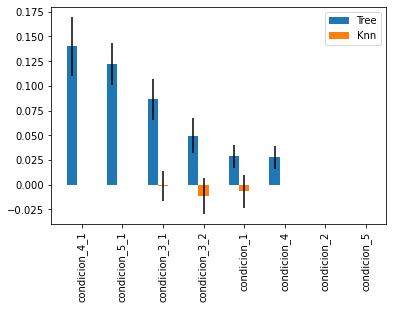

In [23]:
# para el ejer5_2
def inspection_permutation_importance (algoritmo_1, algoritmo_2, x_train, y_train,legenda):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.inspection import permutation_importance
    pimp_algoritmo_1 = permutation_importance(algoritmo_1, x_train, y_train, n_repeats=10)
    pimp_algoritmo_2 = permutation_importance(algoritmo_2, x_train, y_train, n_repeats=10)
    imp_df = pd.DataFrame({'ft': features.columns,
                       'algoritmo_2_mean': pimp_algoritmo_2.importances_mean,
                       'algoritmo_2_std': pimp_algoritmo_2.importances_std,
                       'algoritmo_1_mean': pimp_algoritmo_1.importances_mean,
                       'algoritmo_1_std': pimp_algoritmo_1.importances_std
                      })
    imp_df.sort_values('algoritmo_2_mean', ascending=False, inplace=True)
    imp_df_better = imp_df.iloc[:10]
    
    bw=0.25
    plt.bar(np.arange(imp_df_better.shape[0]),
                      imp_df_better.algoritmo_2_mean,
                      yerr=imp_df_better.algoritmo_2_std,
                      width=bw,
                      tick_label=imp_df_better.ft,
                      )
    plt.bar(np.arange(imp_df_better.shape[0])+bw,
                      imp_df_better.algoritmo_1_mean,
                      yerr=imp_df_better.algoritmo_1_std,
                      width=bw,
                      tick_label=imp_df_better.ft)
    plt.legend(legenda)
    plt.xticks(rotation=90)
    return


algoritmo_1 = knn
algoritmo_2 = dTree
legenda = ['Tree','Knn']
inspection_permutation_importance (algoritmo_1, algoritmo_2, x_train, y_train,legenda)


#7_1

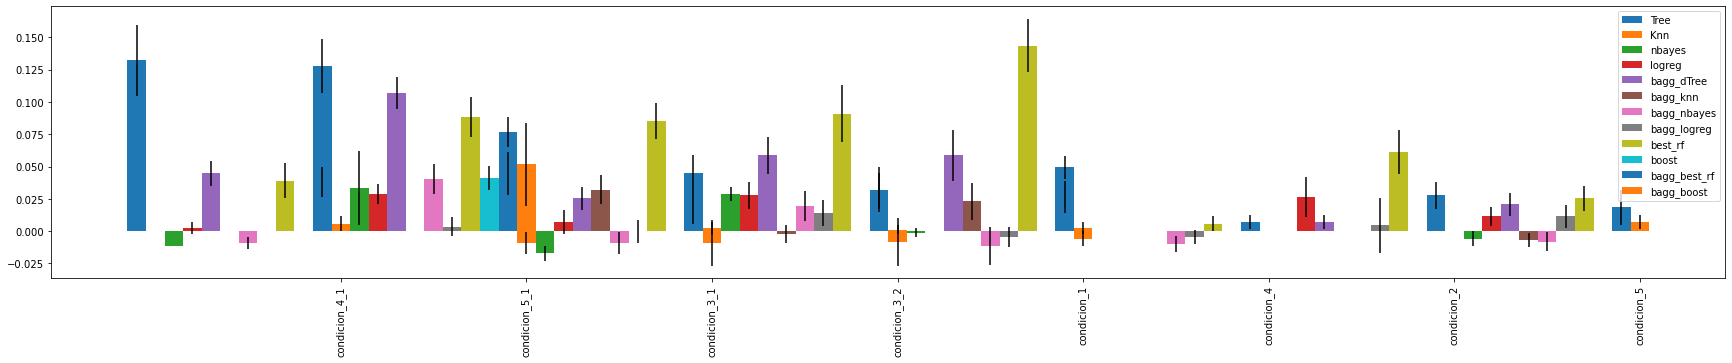

In [25]:
#completo para los 10 algoritmos
# para el ejer5_2
def inspection_permutation_importance (algoritmo_1, algoritmo_2, algoritmo_3, algoritmo_4, algoritmo_5, algoritmo_6, algoritmo_7, algoritmo_8, algoritmo_9, algoritmo_10, algoritmo_11, algoritmo_12, x_train, y_train,legenda):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.inspection import permutation_importance
    pimp_algoritmo_1 = permutation_importance(algoritmo_1, x_train, y_train, n_repeats=10)
    pimp_algoritmo_2 = permutation_importance(algoritmo_2, x_train, y_train, n_repeats=10)
    pimp_algoritmo_3 = permutation_importance(algoritmo_3, x_train, y_train, n_repeats=10)
    pimp_algoritmo_4 = permutation_importance(algoritmo_4, x_train, y_train, n_repeats=10)
    pimp_algoritmo_5 = permutation_importance(algoritmo_5, x_train, y_train, n_repeats=10)
    pimp_algoritmo_6 = permutation_importance(algoritmo_6, x_train, y_train, n_repeats=10)
    pimp_algoritmo_7 = permutation_importance(algoritmo_7, x_train, y_train, n_repeats=10)
    pimp_algoritmo_8 = permutation_importance(algoritmo_8, x_train, y_train, n_repeats=10)
    pimp_algoritmo_9 = permutation_importance(algoritmo_9, x_train, y_train, n_repeats=10)
    pimp_algoritmo_10 = permutation_importance(algoritmo_10, x_train, y_train, n_repeats=10)
    pimp_algoritmo_11 = permutation_importance(algoritmo_11, x_train, y_train, n_repeats=10)
    pimp_algoritmo_12 = permutation_importance(algoritmo_12, x_train, y_train, n_repeats=10)
    imp_df = pd.DataFrame({'ft': features.columns,
                           'algoritmo_1_mean': pimp_algoritmo_1.importances_mean,
                           'algoritmo_1_std': pimp_algoritmo_1.importances_std,
                           'algoritmo_2_mean': pimp_algoritmo_2.importances_mean,
                           'algoritmo_2_std': pimp_algoritmo_2.importances_std,
                           'algoritmo_3_mean': pimp_algoritmo_3.importances_mean,
                           'algoritmo_3_std': pimp_algoritmo_3.importances_std,
                           'algoritmo_4_mean': pimp_algoritmo_4.importances_mean,
                           'algoritmo_4_std': pimp_algoritmo_4.importances_std,
                           'algoritmo_5_mean': pimp_algoritmo_5.importances_mean,
                           'algoritmo_5_std': pimp_algoritmo_5.importances_std,
                           'algoritmo_6_mean': pimp_algoritmo_6.importances_mean,
                           'algoritmo_6_std': pimp_algoritmo_6.importances_std,
                           'algoritmo_7_mean': pimp_algoritmo_7.importances_mean,
                           'algoritmo_7_std': pimp_algoritmo_7.importances_std,
                           'algoritmo_8_mean': pimp_algoritmo_8.importances_mean,
                           'algoritmo_8_std': pimp_algoritmo_8.importances_std,
                           'algoritmo_9_mean': pimp_algoritmo_9.importances_mean,
                           'algoritmo_9_std': pimp_algoritmo_9.importances_std,
                           'algoritmo_10_mean': pimp_algoritmo_10.importances_mean,
                           'algoritmo_10_std': pimp_algoritmo_10.importances_std,
                           'algoritmo_11_mean': pimp_algoritmo_11.importances_mean,
                           'algoritmo_11_std': pimp_algoritmo_11.importances_std,
                           'algoritmo_12_mean': pimp_algoritmo_12.importances_mean,
                           'algoritmo_12_std': pimp_algoritmo_12.importances_std,
                      })
    imp_df.sort_values('algoritmo_1_mean', ascending=False, inplace=True)
    imp_df_better = imp_df.iloc[:10]
    
    bw=0.25
    bw=0.1
    plt.rcParams["figure.figsize"] = (30, 5)
    plt.bar(np.arange(imp_df_better.shape[0]),
                      imp_df_better.algoritmo_1_mean,
                      yerr=imp_df_better.algoritmo_1_std,
                      width=bw,

                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+bw,
                      imp_df_better.algoritmo_2_mean,
                      yerr=imp_df_better.algoritmo_2_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*2),
                      imp_df_better.algoritmo_3_mean,
                      yerr=imp_df_better.algoritmo_3_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*3),
                      imp_df_better.algoritmo_4_mean,
                      yerr=imp_df_better.algoritmo_4_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*4),
                      imp_df_better.algoritmo_5_mean,
                      yerr=imp_df_better.algoritmo_5_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*5),
                      imp_df_better.algoritmo_6_mean,
                      yerr=imp_df_better.algoritmo_6_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*6),
                      imp_df_better.algoritmo_7_mean,
                      yerr=imp_df_better.algoritmo_7_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*7),
                      imp_df_better.algoritmo_8_mean,
                      yerr=imp_df_better.algoritmo_8_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*8),
                      imp_df_better.algoritmo_9_mean,
                      yerr=imp_df_better.algoritmo_9_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*9),
                      imp_df_better.algoritmo_10_mean,
                      yerr=imp_df_better.algoritmo_10_std,
                      width=bw,
                      tick_label=imp_df_better.ft)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*10),
                      imp_df_better.algoritmo_11_mean,
                      yerr=imp_df_better.algoritmo_11_std,
                      width=bw,
                      tick_label=imp_df_better.ft,)
    plt.bar(np.arange(imp_df_better.shape[0])+(bw*11),
                      imp_df_better.algoritmo_12_mean,
                      yerr=imp_df_better.algoritmo_12_std,
                      width=bw,
                      tick_label=imp_df_better.ft)
    plt.legend(legenda)
    plt.xticks(rotation=90)
    return imp_df_better


algoritmo_1 = dTree
algoritmo_2 = knn
algoritmo_3 = nbayes
algoritmo_4 = logreg
algoritmo_5 = bagg_dTree
algoritmo_6 = bagg_knn
algoritmo_7 = bagg_nbayes
algoritmo_8 = bagg_logreg
algoritmo_9 = best_rf
algoritmo_10 = boost
algoritmo_11 = bagg_best_rf
algoritmo_12 = bagg_boost
legenda = ['Tree','Knn','nbayes','logreg','bagg_dTree','bagg_knn','bagg_nbayes','bagg_logreg','best_rf','boost', 'bagg_best_rf', 'bagg_boost']
imp_df_better = inspection_permutation_importance (algoritmo_1, algoritmo_2, algoritmo_3, algoritmo_4, algoritmo_5, algoritmo_6, algoritmo_7, algoritmo_8, algoritmo_9, algoritmo_10, algoritmo_11, algoritmo_12, x_train, y_train,legenda)



